In [6]:
from math import sqrt

import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

from kmeans import KMeans

In [7]:
def scatter(points, centroids = None, colors = "red", title = "", figsize = (5,5)):
    plt.figure(figsize = figsize)
    plt.scatter(points[:,0], points[:,1], c=colors, cmap="Set1")
    if not centroids is None:
        plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='x')
    
    plt.title(title)
    plt.show()

## Plot some sample data

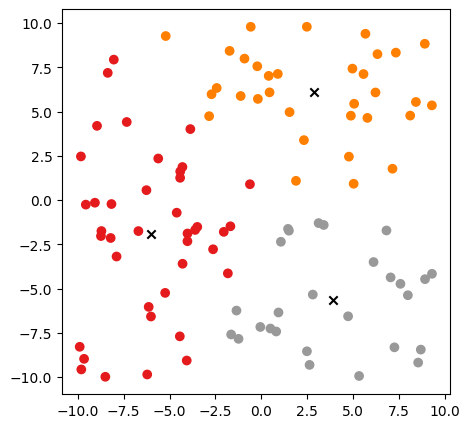

In [8]:
N = 100
points = np.random.uniform(-10, 10, (N, 2))

# Cluster
kmeans = KMeans(n_clusters = 3, n_iterations = 10)
labels, centroids = kmeans.cluster(points)

scatter(points, centroids, labels)

### Select K based on average radius

In [9]:
def calculate_average_radius(points, labels, centroids):
    """
    Calculate the average radius of each cluster.
    See. Week 6 slide 34
    """
    n_clusters = len(centroids)
    average_radius = np.zeros(n_clusters)
    
    for i in range(n_clusters):
        
        # Get the distances from the points to their centroid
        cluster_points = points[labels == i]
        distances = np.sqrt(((cluster_points - centroids[i])**2).sum(axis=1).mean())
        
        average_radius[i] = distances
    
    return average_radius

In [10]:
K = 20

scores = []

for k in trange(1, K + 1):
    kmeans = KMeans(n_clusters = k, n_iterations = 10)
    labels, centroids = kmeans.cluster(points)
    # We return the mean of the average radius per cluster - maybe it should be a mean or something else idk
    score = calculate_average_radius(points, labels, centroids).mean()
    scores.append(score)

    # scatter(points, centroids, labels, f"k: {score}")    

 40%|████      | 8/20 [00:00<00:00, 79.31it/s]

100%|██████████| 20/20 [00:00<00:00, 50.94it/s]


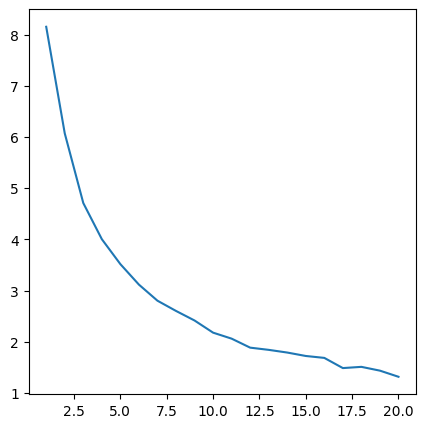

In [11]:
plt.figure(figsize=(5,5))
plt.plot(range(1, K + 1), scores)
plt.show()

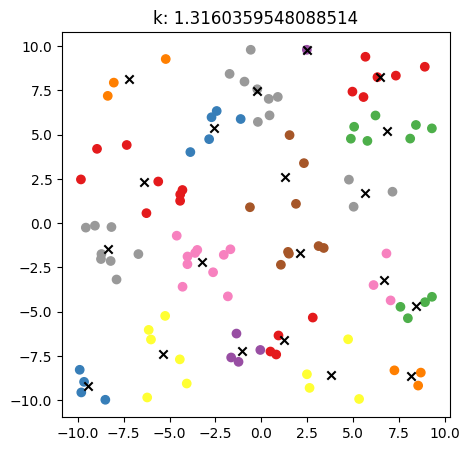

In [12]:
# Plot the last clustering for fun
scatter(points, centroids, labels, f"k: {score}")    

### Davies-Bouldin index

In [16]:
def davies_bouldin_score(points, labels, centroids):
    """ Computes the Davies-Bouldin score of a cluster, see Week 6 slide 26 """
    k = len(centroids)
    score = 0

    r = calculate_average_radius(points, labels, centroids)

    for i in range(k):
        max_ratio = 0

        for j in range(k):
            if i == j:
                continue
            
            # Calculate the distance between centroids
            dist = np.linalg.norm(centroids[i] - centroids[j])

            # Get the max of the ratios
            max_ratio = max((r[i] + r[j]) / dist, max_ratio)
            
        score += max_ratio

    return score / k

In [17]:
davies_bouldin_score(points, labels, centroids)

0.7928221076836037

# DBSCAN algorithm

In [19]:
from dbscan import dbscan

N = 100
points = np.random.uniform(-10, 10, (N, 2))

labels = dbscan(points.tolist(), eps = 1.5, min_neighbours = 3, dist_function = "eucliean")

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, -1}


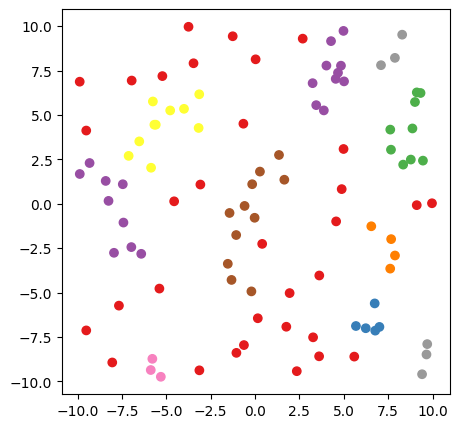

In [20]:
print(set(labels))
scatter(points, colors=labels)